In [1]:
# https://dacon.io/competitions/official/235930/codeshare/5236?page=1&dtype=recent

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, auc,roc_auc_score,average_precision_score

from sklearn.preprocessing import StandardScaler

In [3]:
train_df = pd.read_csv('../dataset/train.csv')
val_df = pd.read_csv('../dataset/val.csv')
test_df = pd.read_csv('../dataset/test.csv')

In [4]:
train_df.head()

ID        V1        V2        V3        V4        V5        V6        V7  \
0   3 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
1   4 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
2   6 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
3   8 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
4   9 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
1  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
2  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.232794   
3 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709 -0.415267   
4  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592  0.373205   

        V26       V27       V28       V29       V30  
0 -0.139097 -0.055353 -0.059752  4.983721 -0.994972  
1 -0.221929  0.062723  0.061458  1.418291 -0.994972  
2  0.105915  0.253844  0.081080 -0.256131 -0.994960  
3 -0.051634 -1.206921 -1.085339  0.262698 -0.994901  
4 -0.384157  0.011747  0.142404  0.994900 -0.994901  

[5 rows x 31 columns]

In [5]:
train_df.shape

(113842, 31)

In [6]:
val_df.head()

ID        V1        V2        V3        V4        V5        V6        V7  \
0  10 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   
1  22  0.962496  0.328461 -0.171479  2.109204  1.129566  1.696038  0.107712   
2  63  1.145524  0.575068  0.194008  2.598192 -0.092210 -1.044430  0.531588   
3  69  0.927060 -0.323684  0.387585  0.544474  0.246787  1.650358 -0.427576   
4  83 -3.005237  2.600138  1.483691 -2.418473  0.306326 -0.824575  2.065426   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.069539 -0.736727  ... -0.633753 -0.120794 -0.385050 -0.069733  0.094199   
1  0.521502 -1.191311  ...  0.402492 -0.048508 -1.371866  0.390814  0.199964   
2 -0.241888 -0.896287  ... -0.119703 -0.076510  0.691320  0.633984  0.048741   
3  0.615371  0.226278  ...  0.079359  0.096632 -0.992569  0.085096  0.377447   
4 -1.829347  4.009259  ... -0.181268 -0.163747  0.515821  0.136318  0.460054   

        V27       V28       V29       V30  Class  
0  0.246219  0.083076 -0.255991 -0.994878      0  
1  0.016371 -0.014605  0.168937 -0.994784      0  
2 -0.053192  0.016251  0.169496 -0.994502      0  
3  0.036096 -0.005960  0.331307 -0.994467      0  
4 -0.251259 -1.105751 -0.287012 -0.994373      0  

[5 rows x 32 columns]

In [7]:
val_df.shape

(28462, 32)

In [8]:
test_df.shape

(142503, 31)

In [9]:
val_df.Class.value_counts()

0    28432
1       30
Name: Class, dtype: int64

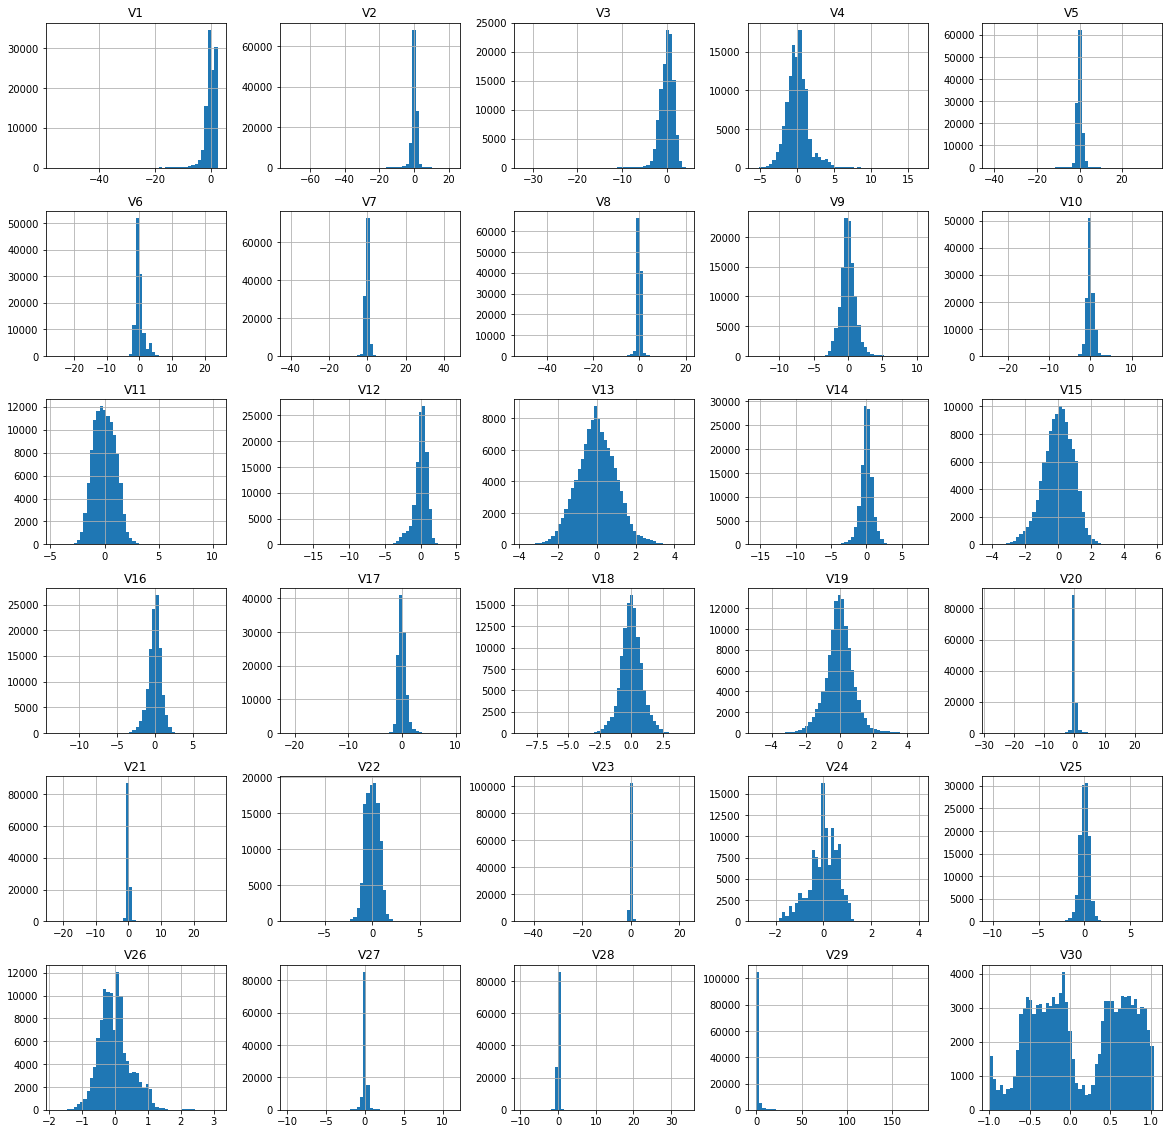

In [10]:
train_df.drop(columns=['ID']).hist(bins= 50, figsize=(20,20))
plt.show()

In [11]:
# train_df['Class'] = 'train'
# # val_df['Class'] = 'val'
# test_df['Class'] = 'test'

In [12]:
# df = pd.concat([train_df, val_df, test_df], axis=0)
# df.shape

In [13]:
# columns = df.columns[1:-1].values
# columns

In [14]:
# scaler = StandardScaler()
# df[columns] = scaler.fit_transform(df[columns])

In [15]:
# df.drop(columns=['ID']).hist(bins=40, figsize=(20,20))
# plt.show()

In [16]:
# train = df[df['Class'] == 'train']
# test = df[df['Class'] == 'test']
# val = df[(df['Class'] != 'train') & (df['Class'] != 'test')]

In [17]:
# print(train.shape)
# print(val.shape)
# print(test.shape)


In [18]:
# train.drop(columns=['ID']).hist(bins=40, figsize=(20,20))
# plt.show()

In [19]:
train_df.drop(columns=['ID']).corr().style.background_gradient(cmap='coolwarm')

In [20]:
# val_df[val_df['Class'] == 1].drop(columns=['ID']).hist(bins=40, figsize=(20,20))
# plt.show()

In [21]:
# val_df[val_df['Class'] == 1].drop(columns=['ID', 'Class']).corr().style.background_gradient(cmap='coolwarm')

In [22]:
# val_df[val_df['Class'] == 0].drop(columns=['ID', 'Class'])[100:130].corr().style.background_gradient(cmap='coolwarm')

In [23]:
val_df[val_df['Class'] == 1].drop(columns=['ID', 'Class']).transpose().corr().style.background_gradient(cmap='coolwarm')

In [24]:
val_df[val_df['Class'] == 0].drop(columns=['ID', 'Class'])[1000:1030].transpose().corr().style.background_gradient(cmap='coolwarm')

In [25]:
train_df.describe()

ID             V1             V2             V3  \
count  113842.000000  113842.000000  113842.000000  113842.000000   
mean   142025.527837       0.000197       0.001289       0.009717   
std     82248.545392       1.951060       1.651064       1.496916   
min         3.000000     -56.407510     -72.715728     -32.454198   
25%     70796.750000      -0.923479      -0.595602      -0.883877   
50%    141722.000000       0.012074       0.066390       0.183868   
75%    213359.500000       1.315373       0.801687       1.037120   
max    284803.000000       2.454930      21.467203       4.187811   

                  V4             V5             V6             V7  \
count  113842.000000  113842.000000  113842.000000  113842.000000   
mean       -0.004169       0.000475       0.005141       0.005769   
std         1.412633       1.367533       1.330583       1.204111   
min        -5.600607     -42.147898     -26.160506     -41.506796   
25%        -0.853728      -0.689853      -0.766094      -0.552071   
50%        -0.019359      -0.054060      -0.272436       0.039036   
75%         0.742208       0.614214       0.405285       0.568750   
max        16.491217      34.801666      23.917837      44.054461   

                  V8             V9  ...            V21           V22  \
count  113842.000000  113842.000000  ...  113842.000000  1.138420e+05   
mean       -0.002451      -0.002107  ...      -0.001242  4.088347e-07   
std         1.185504       1.095415  ...       0.722001  7.238291e-01   
min       -50.943369     -13.434066  ...     -22.757540 -8.887017e+00   
25%        -0.209492      -0.647477  ...      -0.229710 -5.402665e-01   
50%         0.020970      -0.052157  ...      -0.030281  8.345807e-03   
75%         0.328303       0.590705  ...       0.186001  5.287508e-01   
max        20.007208      10.392889  ...      27.202839  8.361985e+00   

                 V23            V24            V25            V26  \
count  113842.000000  113842.000000  113842.000000  113842.000000   
mean       -0.001317      -0.000884       0.001680      -0.000293   
std         0.636061       0.605854       0.520069       0.480979   
min       -44.807735      -2.824849     -10.295397      -1.855355   
25%        -0.162180      -0.355582      -0.315470      -0.326160   
50%        -0.012261       0.040573       0.018278      -0.052815   
75%         0.147474       0.438225       0.353989       0.240838   
max        22.528412       4.022866       7.519589       3.119295   

                 V27            V28            V29            V30  
count  113842.000000  113842.000000  113842.000000  113842.000000  
mean       -0.000234      -0.000508       0.927253       0.116232  
std         0.399505       0.356130       3.412933       0.558161  
min        -9.895244      -9.617915      -0.307413      -0.994972  
25%        -0.070847      -0.053249      -0.230560      -0.360304  
50%         0.001502       0.011158      -0.000699      -0.002590  
75%         0.091279       0.077851       0.768532       0.640653  
max        11.135740      33.847808     180.101027       1.034951  

[8 rows x 31 columns]

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113842 entries, 0 to 113841
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      113842 non-null  int64  
 1   V1      113842 non-null  float64
 2   V2      113842 non-null  float64
 3   V3      113842 non-null  float64
 4   V4      113842 non-null  float64
 5   V5      113842 non-null  float64
 6   V6      113842 non-null  float64
 7   V7      113842 non-null  float64
 8   V8      113842 non-null  float64
 9   V9      113842 non-null  float64
 10  V10     113842 non-null  float64
 11  V11     113842 non-null  float64
 12  V12     113842 non-null  float64
 13  V13     113842 non-null  float64
 14  V14     113842 non-null  float64
 15  V15     113842 non-null  float64
 16  V16     113842 non-null  float64
 17  V17     113842 non-null  float64
 18  V18     113842 non-null  float64
 19  V19     113842 non-null  float64
 20  V20     113842 non-null  float64
 21  V21     11

In [27]:
train_df.isnull().sum()

ID     0
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

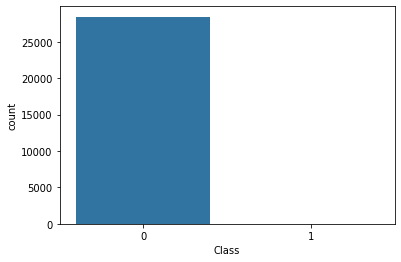

In [28]:
sns.countplot(data=val_df, x='Class')

In [29]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
col=[col for col in val_df.columns if col not in ['Time','Class']]

for i in col:
    sc=RobustScaler()
    val_df[i]=sc.fit_transform(val_df[i].values.reshape(-1,1))

In [30]:
val_df.describe()

ID            V1            V2            V3            V4  \
count  28462.000000  28462.000000  2.846200e+04  2.846200e+04  28462.000000   
mean      -0.000939     -0.008345 -5.241178e-02 -9.252426e-02      0.014773   
std        0.577810      0.865329  1.145330e+00  7.957980e-01      0.882909   
min       -1.002253    -13.239952 -2.738519e+01 -1.610599e+01     -3.172894   
25%       -0.501736     -0.420918 -4.805677e-01 -5.565182e-01     -0.522043   
50%        0.000000      0.000000 -4.951013e-18  7.364104e-18      0.000000   
75%        0.498264      0.579082  5.194323e-01  4.434818e-01      0.477957   
max        0.998383      1.070404  1.171731e+01  2.149187e+00      7.625753   

                 V5            V6            V7            V8            V9  \
count  28462.000000  2.846200e+04  2.846200e+04  28462.000000  28462.000000   
mean       0.037642  2.282727e-01 -3.658564e-02     -0.025429      0.049810   
std        1.029633  1.121533e+00  1.046732e+00      2.063545      0.880374   
min      -16.598967 -1.379280e+01 -2.806863e+01    -49.180487     -7.583077   
25%       -0.497585 -4.289047e-01 -5.323528e-01     -0.436748     -0.464976   
50%        0.000000  2.408962e-17 -3.117081e-18      0.000000      0.000000   
75%        0.502415  5.710953e-01  4.676472e-01      0.563252      0.535024   
max       18.815211  1.077056e+01  2.352987e+01     23.203133      6.459721   

       ...           V22           V23           V24           V25  \
count  ...  2.846200e+04  28462.000000  2.846200e+04  28462.000000   
mean   ... -6.702122e-03      0.041963 -4.878475e-02     -0.021332   
std    ...  6.736630e-01      1.918602  7.599500e-01      0.780506   
min    ... -7.998044e+00    -82.689425 -3.588172e+00     -8.965157   
25%    ... -5.145980e-01     -0.486264 -4.943684e-01     -0.501879   
50%    ...  8.131516e-19      0.000000  4.372384e-18      0.000000   
75%    ...  4.854020e-01      0.513736  5.056316e-01      0.498121   
max    ...  5.680035e+00     61.850933  4.559176e+00      8.160258   

                V26           V27           V28           V29           V30  \
count  2.846200e+04  2.846200e+04  2.846200e+04  28462.000000  28462.000000   
mean   8.794698e-02 -6.262654e-03 -9.312708e-02      0.913665      0.117794   
std    8.509984e-01  2.450379e+00  2.284694e+00      3.330221      0.558406   
min   -2.715360e+00 -6.087525e+01 -6.289799e+01     -0.311381     -0.997321   
25%   -4.898380e-01 -4.492266e-01 -4.842868e-01     -0.231312     -0.360144   
50%    6.088473e-18  1.683478e-19  6.512836e-18      0.000000      0.000000   
75%    5.101620e-01  5.507734e-01  5.157132e-01      0.768688      0.639856   
max    5.472269e+00  5.412785e+01  1.179924e+02    165.083440      1.033116   

              Class  
count  28462.000000  
mean       0.001054  
std        0.032449  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 32 columns]

In [31]:
X=val_df.drop(labels=['ID'],axis=1)

In [32]:
X.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -0.162183  0.744996  0.460888 -0.126025  0.425798  0.029493  0.543793   
1  0.420827  0.180512 -0.184265  1.338888  0.911796  1.715678  0.055189   
2  0.502862  0.356470  0.009671  1.646140 -0.030407 -0.662816  0.435991   
3  0.404945 -0.284802  0.112386  0.355701  0.231019  1.676032 -0.425702   
4 -1.357545  1.801384  0.694003 -1.506046  0.276934 -0.472000  1.813960   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.087732 -0.540813 -0.269284  ... -0.599702 -0.356990 -0.535618 -0.128020   
1  0.932874 -0.907689  0.829401  ...  0.368038 -0.121157 -1.778912  0.554243   
2 -0.494616 -0.669588  0.863186  ... -0.119635 -0.212511  0.820505  0.914479   
3  1.108403  0.236388 -0.126969  ...  0.066268  0.352363 -1.301033  0.101346   
4 -3.463062  3.289473  6.192857  ... -0.177131 -0.497122  0.599392  0.177229   

        V26       V27       V28       V29       V30  Class  
0  0.252386  1.527353  0.532632 -0.260226 -0.997321      0  
1  0.438040  0.098722 -0.200798  0.162502 -0.997227      0  
2  0.172593 -0.333646  0.030888  0.163058 -0.996945      0  
3  0.749585  0.221328 -0.135888  0.324031 -0.996909      0  
4  0.894588 -1.564736 -8.393583 -0.291086 -0.996815      0  

[5 rows x 31 columns]

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

X2D = pd.DataFrame(X2D, columns=['pca1', 'pca2'])
X2D['Class'] = val_df['Class']

In [34]:
print(pca.explained_variance_ratio_)

[0.23683675 0.10854777]


In [35]:
X2D.head()

pca1      pca2  Class
0 -1.034767 -1.567598      0
1 -0.992193 -0.018794      0
2 -0.872695  0.366270      0
3 -0.773362 -0.211486      0
4  0.951739  1.889118      0

In [36]:
samp = X2D.sample(frac=1)

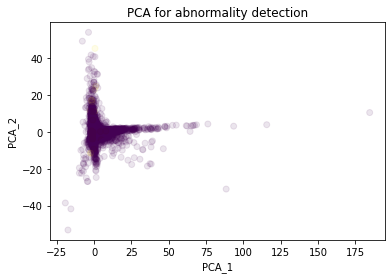

In [37]:
plt.scatter(samp['pca1'],samp['pca2'],c=samp['Class'],alpha=0.1);
plt.title('PCA for abnormality detection');
plt.xlabel('PCA_1');
plt.ylabel('PCA_2');

In [38]:
from sklearn.decomposition import PCA 

pca=PCA(n_components=3)
X3D=pca.fit_transform(X)

X3D=pd.DataFrame(X3D,columns=['pca1','pca2','pca3'])
X3D['Class']=val_df['Class']

# We can change the frac value to reduce the points plotted 
samp=X3D.sample(frac=1)

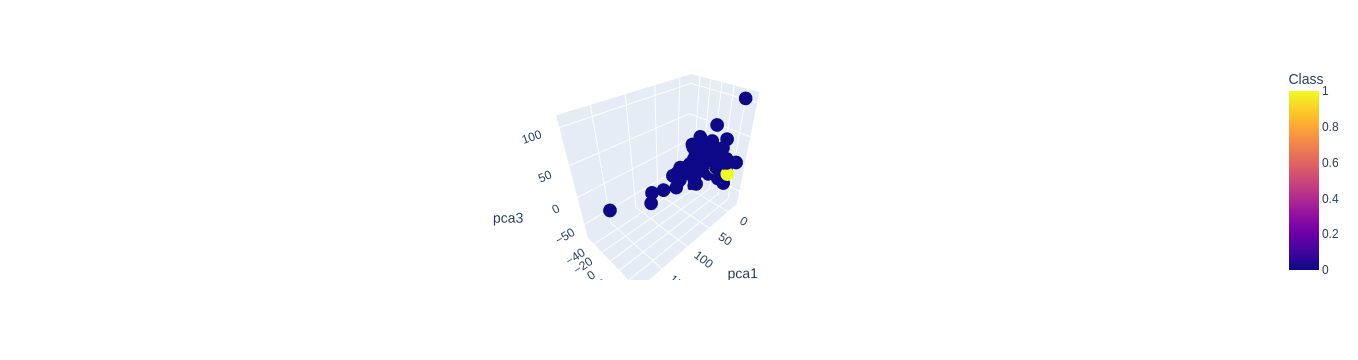

In [40]:
import plotly.express as px
fig = px.scatter_3d(samp, x='pca1', y='pca2', z='pca3',
              color='Class')
fig.show()